# Financial Analysis - Stocks, Bonds, Derivatives

This Notebook contains various snippets of code that allow for the calculation of various measures for a Stock or a Bond. They are as follows. 

- Stocks
1. Beta
2. CAPM
3. Sharpe and Treynor Ratio
4. DCF Model
5. Security Market Line
6. Marokwitz Model (Monte Carlo Simulation)
7. Value at Risk (VaR)
8. IRR and MIRR (Modified IRR)
9. Enterprise Value
10. Equity Value
11. Factor Investing

- Bonds
1. Yield
2. Modified Duration
3. Macaulay Duration
4. IRR

- Derivatives
1. Binomial Model
2. Black-Scholes Model
3. Greeks

### Calculating the Beta of a Stock

In [24]:
import yfinance as yf

# Set the ticker symbol for the stock
ticker = "DDOG"

# Get the historical data for the stock using yfinance
stock_data = yf.Ticker(ticker).history(period="max")

# Get the historical data for the S&P 500 using yfinance
sp500_data = yf.Ticker("^GSPC").history(period="max")

# Calculate the daily returns for the stock and the S&P 500
stock_returns = stock_data["Close"].pct_change()
sp500_returns = sp500_data["Close"].pct_change()

# Merge the daily returns into a single dataframe
merged_returns = stock_returns.to_frame(name="Stock Returns").join(sp500_returns.to_frame(name="S&P 500 Returns"))

# Calculate the covariance matrix and extract the beta value
covariance_matrix = merged_returns.cov()
beta = covariance_matrix.loc["Stock Returns", "S&P 500 Returns"] / covariance_matrix.loc["S&P 500 Returns", "S&P 500 Returns"]

# Print the beta value
print("The beta of {} is {:.2f}".format(ticker, beta))


The beta of DDOG is 1.28


### Calculate the CAPM of a Stock

In [25]:
import yfinance as yf
import numpy as np

# Set the ticker symbol for the stock
ticker = "DDOG"

# Get the historical data for the stock using yfinance
stock_data = yf.Ticker(ticker).history(period="max")

# Get the historical data for the S&P 500 using yfinance
sp500_data = yf.Ticker("^GSPC").history(period="max")

# Calculate the daily returns for the stock and the S&P 500
stock_returns = stock_data["Close"].pct_change()
sp500_returns = sp500_data["Close"].pct_change()

# Merge the daily returns into a single dataframe
merged_returns = stock_returns.to_frame(name="Stock Returns").join(sp500_returns.to_frame(name="S&P 500 Returns"))

# Calculate the expected market return
expected_market_return = np.mean(sp500_returns)

# Calculate the risk-free rate (10-year US Treasury bond yield)
risk_free_rate = 0.015

# Calculate the beta value
covariance_matrix = merged_returns.cov()
beta = covariance_matrix.loc["Stock Returns", "S&P 500 Returns"] / covariance_matrix.loc["S&P 500 Returns", "S&P 500 Returns"]

# Calculate the expected return using the CAPM formula
expected_return = risk_free_rate + beta * (expected_market_return - risk_free_rate)

# Print the CAPM result
print("The CAPM of {} is {:.2%}".format(ticker, expected_return))


The CAPM of DDOG is -0.38%


### Calculate the Treynor and the Sharpe Ratio of a Stock

In [1]:
import yfinance as yf
import numpy as np

# Set the ticker symbol for the stock
ticker = "DDOG"

# Get the historical data for the stock using yfinance
stock_data = yf.Ticker(ticker).history(period="max")

# Get the historical data for the S&P 500 using yfinance
sp500_data = yf.Ticker("^GSPC").history(period="max")

# Calculate the daily returns for the stock and the S&P 500
stock_returns = stock_data["Close"].pct_change()
sp500_returns = sp500_data["Close"].pct_change()

# Merge the daily returns into a single dataframe
merged_returns = stock_returns.to_frame(name="Stock Returns").join(sp500_returns.to_frame(name="S&P 500 Returns"))

# Calculate the expected return and standard deviation for the stock
expected_return = np.mean(stock_returns)
std_deviation = np.std(stock_returns)

# Calculate the risk-free rate (10-year US Treasury bond yield)
risk_free_rate = 0.015

# Calculate the Sharpe Ratio
sharpe_ratio = (expected_return - risk_free_rate) / std_deviation

# Calculate the beta value
covariance_matrix = merged_returns.cov()
beta = covariance_matrix.loc["Stock Returns", "S&P 500 Returns"] / covariance_matrix.loc["S&P 500 Returns", "S&P 500 Returns"]

# Calculate the Treynor Ratio
treynor_ratio = (expected_return - risk_free_rate) / beta

# Print the Sharpe Ratio and Treynor Ratio
print("The Sharpe Ratio of {} is {:.2f}".format(ticker, sharpe_ratio))
print("The Treynor Ratio of {} is {:.2f}".format(ticker, treynor_ratio))


The Sharpe Ratio of DDOG is -0.32
The Treynor Ratio of DDOG is -0.01


### DCF Model

In [2]:
# Define inputs
dividend = 10.0    # dividend per share
discount_rate = 0.12    # discount rate (or cost of capital)
growth_rate = 0.05    # expected annual growth rate of dividends
years = 10   # number of years of dividends to forecast

# Calculate the present value of future dividends
discount_factor = 1 / ((1 + discount_rate) ** years)
pv_dividends = sum([(dividend * (1 + growth_rate) ** n) * discount_factor for n in range(1, years + 1)])

# Calculate the DCF value of the share
dcf_value = pv_dividends / discount_factor

# Print the DCF value
print("The DCF value of the share is:", round(dcf_value, 2))


The DCF value of the share is: 132.07


### Custom Sharpe Ratio Model

In [18]:
import pandas as pd
import yfinance as yf

# Define ticker symbol and time period
ticker = "AAPL"
start_date = "2021-01-01"
end_date = "2023-03-01"

# Get stock data from Yahoo Finance API
stock_data = yf.download(ticker, start=start_date, end=end_date)

# Calculate daily returns and risk-free rate
daily_returns = stock_data['Adj Close'].pct_change()
risk_free_rate = 0.1 / 252  # assume 10% annual rate, 252 trading days per year

# Calculate annualized Sharpe Ratio
annual_returns = daily_returns.mean() * 252
annual_volatility = daily_returns.std() * (252 ** 0.5)
sharpe_ratio = (annual_returns - risk_free_rate) / annual_volatility

print("Sharpe Ratio for {} : {:.2f}".format(ticker, sharpe_ratio))


[*********************100%***********************]  1 of 1 completed
Sharpe Ratio for AAPL : 0.37


### Draw the Security Market Line

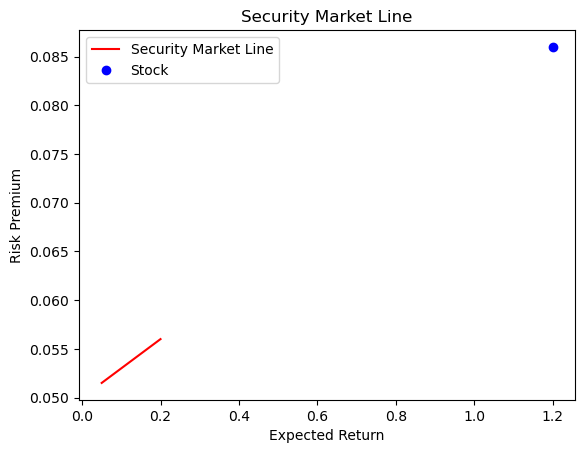

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Define the risk-free rate and expected return of the market
rf = 0.05
market_return = 0.08

# Define the beta and expected return of the stock
beta = 1.2
stock_return = rf + beta * (market_return - rf)

# Generate a range of expected returns
expected_returns = np.linspace(rf, 0.2, 100)

# Calculate the Security Market Line
sml = rf + (market_return - rf) * expected_returns

# Plot the Security Market Line and the stock's expected return
plt.plot(expected_returns, sml, 'r', label='Security Market Line')
plt.plot(beta, stock_return, 'bo', label='Stock')
plt.xlabel('Expected Return')
plt.ylabel('Risk Premium')
plt.title('Security Market Line')
plt.legend()
plt.show()


### Markowitz Model Generation

Optimal weights: [0.01440773 0.01964354 0.96594873]
Expected return: 0.34676940040810295
Standard deviation: 0.1309141491244727
Sharpe ratio: 2.26690088422708


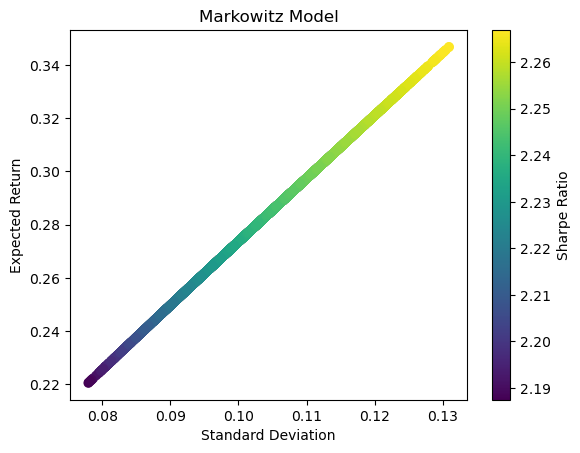

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the expected returns and covariance matrix of the assets
returns = pd.DataFrame({
    'asset_1': [0.2, 0.3, 0.15],
    'asset_2': [0.25, 0.4, 0.20],
    'asset_3': [0.3, 0.5, 0.25]
})

covariance = returns.cov()

# Define the risk-free rate and target return
rf = 0.05
target_return = 0.3

# Calculate the expected returns and standard deviations of the assets
expected_returns = returns.mean()
std_deviations = returns.std()

# Define the number of assets in the portfolio
num_assets = len(returns.columns)

# Define the random weights for the portfolio
np.random.seed(123)
weights = np.random.random(num_assets)
weights /= np.sum(weights)

# Calculate the portfolio return and standard deviation
portfolio_return = np.sum(weights * expected_returns)
portfolio_std = np.sqrt(np.dot(weights.T, np.dot(covariance, weights)))

# Calculate the Sharpe ratio
sharpe_ratio = (portfolio_return - rf) / portfolio_std

# Define the number of iterations for the Monte Carlo simulation
num_iterations = 10000

# Define the arrays to store the results of the Monte Carlo simulation
results = np.zeros((num_iterations, 3))
weights_record = np.zeros((num_iterations, num_assets))

# Run the Monte Carlo simulation
for i in range(num_iterations):
    # Generate random weights for the portfolio
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)

    # Calculate the portfolio return, standard deviation, and Sharpe ratio
    portfolio_return = np.sum(weights * expected_returns)
    portfolio_std = np.sqrt(np.dot(weights.T, np.dot(covariance, weights)))
    sharpe_ratio = (portfolio_return - rf) / portfolio_std

    # Store the results
    results[i][0] = portfolio_return
    results[i][1] = portfolio_std
    results[i][2] = sharpe_ratio
    weights_record[i,:] = weights

# Find the portfolio with the highest Sharpe ratio
max_sharpe = results[:,2].argmax()
optimal_weights = weights_record[max_sharpe,:]

# Print the results
print("Optimal weights:", optimal_weights)
print("Expected return:", results[max_sharpe][0])
print("Standard deviation:", results[max_sharpe][1])
print("Sharpe ratio:", results[max_sharpe][2])

# Plot the results
plt.scatter(results[:,1], results[:,0], c=results[:,2], cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Standard Deviation')
plt.ylabel('Expected Return')
plt.title('Markowitz Model')
plt.show()


### Value at Risk (VaR)

In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
from scipy.stats import norm

# Define the stock symbol and the number of days to use in the calculation
symbol = 'SE'
days = 252  # Use the past year of daily prices

# Retrieve the historical stock prices from Yahoo Finance
stock = yf.Ticker(symbol)
data = stock.history(period=f'{days}d')['Close']
returns = data.pct_change().dropna()

# Calculate the VaR at a given confidence level (e.g. 95%)
confidence_level = 0.05
mean_return = returns.mean()
std_return = returns.std()
z_score = np.abs(norm.ppf(confidence_level))
VaR = -(mean_return - z_score * std_return)

print(f'The {confidence_level * 100}% VaR of {symbol} is ${VaR:.2f} per share.')


The 5.0% VaR of SE is $0.09 per share.


### Bonds - Yield, Modified Duration and Macaulay duration 

In [4]:
# Bond parameters
face_value = 10000 # face value of the bond
coupon_rate = 0.079 # annual coupon rate
coupon_frequency = 2 # coupon payments per year
years_to_maturity = 10 # years to maturity of the bond
market_price = 9900 # current market price of the bond

# Calculate the periodic coupon payment
coupon_payment = face_value * coupon_rate / coupon_frequency

# Calculate the total number of coupon payments
total_coupon_payments = years_to_maturity * coupon_frequency

# Calculate the present value of the bond's future cash flows
discount_rate_guess = 0.06 # initial guess for the yield
present_value = 0
for i in range(1, total_coupon_payments + 1):
    present_value += coupon_payment / (1 + discount_rate_guess / coupon_frequency) ** i
present_value += face_value / (1 + discount_rate_guess / coupon_frequency) ** total_coupon_payments

# Use the bisection method to solve for the yield
tolerance = 0.0001 # tolerance for the yield calculation
yield_guess_low = 0.0
yield_guess_high = 1.0
while True:
    yield_guess_mid = (yield_guess_low + yield_guess_high) / 2
    present_value_mid = 0
    for i in range(1, total_coupon_payments + 1):
        present_value_mid += coupon_payment / (1 + yield_guess_mid / coupon_frequency) ** i
    present_value_mid += face_value / (1 + yield_guess_mid / coupon_frequency) ** total_coupon_payments
    if abs(present_value_mid - market_price) < tolerance:
        break
    elif present_value_mid > market_price:
        yield_guess_low = yield_guess_mid
    else:
        yield_guess_high = yield_guess_mid
bond_yield = yield_guess_mid

# Calculate the Macaulay duration
macaulay_duration = 0
for i in range(1, total_coupon_payments + 1):
    macaulay_duration += i * coupon_payment / (1 + bond_yield / coupon_frequency) ** i
macaulay_duration += years_to_maturity * face_value / (1 + bond_yield / coupon_frequency) ** total_coupon_payments
macaulay_duration /= present_value

# Calculate the modified duration
modified_duration = macaulay_duration / (1 + bond_yield / coupon_frequency)

# Print the results
print(f"Bond Yield: {bond_yield:.4%}")
print(f"Macaulay Duration: {macaulay_duration:.4f} years")
print(f"Modified Duration: {modified_duration:.4f}")


Bond Yield: 8.0475%
Macaulay Duration: 8.2994 years
Modified Duration: 7.9784


### Calculation of IRR for a Bond

In [6]:
import numpy_financial as npf

# Define the bond's cash flows and timing
cash_flows = [-1000, 100, 100, 100, 1100]
timing = [0, 1, 2, 3, 4]

# Calculate the bond's IRR
irr = npf.irr(cash_flows)

# Print the results
print("IRR: {:.2%}".format(irr))


IRR: 10.00%


### Calculate the IRR and MIRR of a Stock

In [20]:
import yfinance as yf
import numpy as np
from scipy import optimize
import numpy_financial as npf
from scipy.optimize import root_scalar

# Set the stock ticker symbol and the start and end dates of the investment period
ticker = 'AAPL'
start_date = '2010-01-01'
end_date = '2022-03-03'

# Get the historical prices of the stock
stock_data = yf.download(ticker, start=start_date, end=end_date)

if len(stock_data) == 0:
    print('No data available for the specified dates')
else:
    # Calculate the cash flows from the investment in the stock
    prices = stock_data['Adj Close'].values
    cash_flows = [-1 * prices[0]]
    for i in range(1, len(prices)):
        cash_flows.append(prices[i] - prices[i-1])

    # Calculate the IRR of the investment
    irr = npf.irr(cash_flows) * 100
    print(f'IRR: {irr:.2f}%')

    # Calculate the MIRR of the investment
    def mirr(cf, reinvest_rate):
        n = len(cf)
        pv_outflows = np.sum(cf[:n-1] / (1 + irr / 100) ** np.arange(1, n))
        fv_inflows = np.sum(cf[n-1] * (1 + reinvest_rate) ** np.arange(n-1))
        return (fv_inflows / (pv_outflows * (1 + reinvest_rate))) ** (1 / (n - 1)) - 1

    try:
        res = root_scalar(lambda r: mirr(cash_flows, r - 1), bracket=[0, 2], method='brentq', rtol=1e-10)
        mirr = (1 + res.root) ** 12 - 1
        print(f'MIRR: {mirr:.2f}%')
    except ValueError:
        print('MIRR could not be calculated')


[*********************100%***********************]  1 of 1 completed
IRR: 0.21%
MIRR could not be calculated


/var/folders/mf/r664td9s2dl_lprk6yy30fx80000gn/T/ipykernel_9133/1696592178.py:33: RuntimeWarning: divide by zero encountered in double_scalars
  return (fv_inflows / (pv_outflows * (1 + reinvest_rate))) ** (1 / (n - 1)) - 1
/var/folders/mf/r664td9s2dl_lprk6yy30fx80000gn/T/ipykernel_9133/1696592178.py:32: RuntimeWarning: overflow encountered in power
  fv_inflows = np.sum(cf[n-1] * (1 + reinvest_rate) ** np.arange(n-1))
/var/folders/mf/r664td9s2dl_lprk6yy30fx80000gn/T/ipykernel_9133/1696592178.py:32: RuntimeWarning: overflow encountered in multiply
  fv_inflows = np.sum(cf[n-1] * (1 + reinvest_rate) ** np.arange(n-1))


### Binomial Model

In [21]:
import math

def binomial_model(S, K, r, T, sigma, N):
    delta_t = T / N
    u = math.exp(sigma * math.sqrt(delta_t))
    d = 1 / u
    p = (math.exp(r * delta_t) - d) / (u - d)
    q = 1 - p

    # Calculate the stock prices at each node of the tree
    stock_prices = []
    for i in range(N+1):
        stock_price = S * u**(N-i) * d**i
        stock_prices.append(stock_price)

    # Calculate the option payoffs at expiration
    option_payoffs = []
    for stock_price in stock_prices:
        option_payoff = max(stock_price - K, 0)
        option_payoffs.append(option_payoff)

    # Calculate the option values at each node of the tree
    option_values = option_payoffs[:]
    for j in range(N):
        for i in range(N-j):
            option_value = math.exp(-r * delta_t) * (p * option_values[i] + q * option_values[i+1])
            option_values[i] = option_value

    option_value = option_values[0]

    return option_value

# Set the parameters of the option and the binomial model
S = 100  # current stock price
K = 105  # strike price
r = 0.079  # risk-free interest rate
T = 1  # time to expiration in years
sigma = 0.2  # volatility of the stock price
N = 100  # number of time steps in the binomial model

# Calculate the value of the call option using the binomial model
call_option_value = binomial_model(S, K, r, T, sigma, N)
print(f"The value of the call option is: {call_option_value:.2f}")


The value of the call option is: 9.43


### Black-Scholes Model (European Call Option)

In [22]:
import math
from scipy.stats import norm

def black_scholes_call(S, K, r, T, sigma):
    d1 = (math.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * math.sqrt(T))
    d2 = d1 - sigma * math.sqrt(T)
    N_d1 = norm.cdf(d1)
    N_d2 = norm.cdf(d2)

    call_value = S * N_d1 - K * math.exp(-r * T) * N_d2

    return call_value

# Set the parameters of the option and the Black-Scholes model
S = 100  # current stock price
K = 105  # strike price
r = 0.079  # risk-free interest rate
T = 1  # time to expiration in years
sigma = 0.2  # volatility of the stock price

# Calculate the value of the call option using the Black-Scholes model
call_option_value = black_scholes_call(S, K, r, T, sigma)
print(f"The value of the call option is: {call_option_value:.2f}")


The value of the call option is: 9.42


### Greeks

In [30]:
# Install QuantLib
%pip install QuantLib

Note: you may need to restart the kernel to use updated packages.


In [28]:
import QuantLib as ql

# Define the option parameters
maturity_date = ql.Date(31, 12, 2023)
spot_price = 100
strike_price = 105
volatility = 0.2
dividend_rate = 0.0
option_type = ql.Option.Call

# Set up the market data
risk_free_rate = 0.01
day_count = ql.Actual365Fixed()
calendar = ql.UnitedStates(ql.UnitedStates.NYSE)
calculation_date = ql.Date(1, 1, 2023)
ql.Settings.instance().evaluationDate = calculation_date
discount_curve = ql.YieldTermStructureHandle(
    ql.FlatForward(calculation_date, risk_free_rate, day_count)
)
dividend_yield = ql.YieldTermStructureHandle(
    ql.FlatForward(calculation_date, dividend_rate, day_count)
)
spot_handle = ql.QuoteHandle(
    ql.SimpleQuote(spot_price)
)
volatility_handle = ql.BlackVolTermStructureHandle(
    ql.BlackConstantVol(calculation_date, calendar, volatility, day_count)
)

# Set up the option payoff
exercise = ql.EuropeanExercise(maturity_date)
payoff = ql.PlainVanillaPayoff(option_type, strike_price)
option = ql.VanillaOption(payoff, exercise)

# Calculate the option price and Greeks
process = ql.BlackScholesMertonProcess(spot_handle, dividend_yield, discount_curve, volatility_handle)
option.setPricingEngine(ql.AnalyticEuropeanEngine(process))
print("Option price: ", option.NPV())
print("Delta: ", option.delta())
print("Gamma: ", option.gamma())
print("Theta: ", option.thetaPerDay())
print("Vega: ", option.vega())


Option price:  6.285270889592494
Delta:  0.4623594431123449
Gamma:  0.019885521646641154
Theta:  -0.01199071524258808
Vega:  39.662081530834975


### Binomial Model using QuantLib

In [3]:
import QuantLib as ql

# Define the option parameters
maturity_date = ql.Date(31, 12, 2023)
spot_price = 100
strike_price = 105
volatility = 0.2
dividend_rate = 0.0
option_type = ql.Option.Call

# Set up the market data
risk_free_rate = 0.01
day_count = ql.Actual365Fixed()
calculation_date = ql.Date(1, 1, 2023)
ql.Settings.instance().evaluationDate = calculation_date
dividend_yield = ql.YieldTermStructureHandle(
    ql.FlatForward(calculation_date, dividend_rate, day_count)
)
flat_ts = ql.YieldTermStructureHandle(
    ql.FlatForward(calculation_date, risk_free_rate, day_count)
)
vol_ts = ql.BlackVolTermStructureHandle(
    ql.BlackConstantVol(calculation_date, ql.NullCalendar(), volatility, day_count)
)
bsm_process = ql.BlackScholesMertonProcess(
    ql.QuoteHandle(ql.SimpleQuote(spot_price)),
    dividend_yield,
    flat_ts,
    vol_ts,
)

# Set up the option payoff
exercise = ql.EuropeanExercise(maturity_date)
payoff = ql.PlainVanillaPayoff(option_type, strike_price)
option = ql.VanillaOption(payoff, exercise)

# Set up the binomial tree
steps = 100
bsm_engine = ql.AnalyticEuropeanEngine(bsm_process)
binomial_engine = ql.BinomialVanillaEngine(bsm_process, "crr", steps)
option.setPricingEngine(binomial_engine)

# Calculate the option price
option_price = option.NPV()
print("Option price: ", option_price)


Option price:  6.291905290871893


### Fate of Forward Contracts

In [10]:
import QuantLib as ql

# Set up the valuation date and the yield term structure
valuation_date = ql.Date(1, 1, 2021)
ql.Settings.instance().evaluationDate = valuation_date
yield_ts = ql.YieldTermStructureHandle(
    ql.FlatForward(valuation_date, 0.01, ql.Actual365Fixed())
)

# Set up the contract parameters
delivery_date = ql.Date(1, 1, 2022)
maturity_date = ql.Date(1, 1, 2023)
underlying_price = 100
forward_price = 110

# Calculate the fair forward price
t = yield_ts.dayCounter().yearFraction(valuation_date, delivery_date)
df = yield_ts.discount(delivery_date)
S = underlying_price
F = forward_price
fair_forward_price = (S - df*F) / df

print("Forward Rate: ", fair_forward_price)

Forward Rate:  -8.994983291583196


### Enterprise and Equity Value

In [2]:
# Define inputs
revenue_growth_rate = 0.5
discount_rate = 0.15
terminal_growth_rate = 0.05
ebitda_margin = 0.4
capital_expenditures = 500000
depreciation = 100000
tax_rate = 0.3

# Calculate terminal value
ebitda_last_year = 20000000
ebitda_last_year_growth = ebitda_last_year * (1 + revenue_growth_rate)
terminal_value = (ebitda_last_year_growth * (1 + terminal_growth_rate)) / (discount_rate - terminal_growth_rate)

# Calculate free cash flows
fcf = []
for i in range(1, 6):
    ebitda = ebitda_last_year_growth * (1 + revenue_growth_rate) ** i
    taxes = tax_rate * (ebitda - depreciation - capital_expenditures)
    free_cash_flow = ebitda - taxes - capital_expenditures + depreciation
    fcf.append(free_cash_flow)

# Calculate discounted free cash flows
npv = sum([x / (1 + discount_rate) ** i for i, x in enumerate(fcf)])
npv += terminal_value / (1 + discount_rate) ** 5

# Calculate enterprise value
enterprise_value = npv

# Calculate equity value
debt = 10000000
cash = 2000000
equity_value = enterprise_value - debt + cash

# Print results
print("Enterprise Value: ${:,.2f}".format(enterprise_value))
print("Equity Value: ${:,.2f}".format(equity_value))


Enterprise Value: $443,020,185.16
Equity Value: $435,020,185.16


### Factor Investing

#### For best results, run the query during market hours

In [1]:
# Shifted over to yahooquery since yfinance was causing issues with decryption

from yahooquery import Ticker
import pandas as pd

# Define the quality factor using return on equity (ROE)
quality_threshold = 0.15

# Define the momentum factor using 12-month returns
momentum_period = 12

# Define the minimum market cap for screening
min_market_cap = 500000000

# Download stock data from Yahoo Finance
tickers = ['ZS', 'S', 'CRWD', 'PANW', 'FTNT', 'NET']
ticker_objs = [Ticker(ticker) for ticker in tickers]

# Filter stocks based on quality and momentum factors
quality_scores = []
momentum_scores = []
for ticker_obj in ticker_objs:
    try:
        price = ticker_obj.price
        market_cap = ticker_obj.summary_detail[ticker_obj.symbols[0]]['marketCap']
    except Exception as e:
        print(f"Error getting data for {ticker_obj.symbols}: {str(e)}")
        continue
    if market_cap < min_market_cap:
        continue
    if len(price) < momentum_period:
        continue
    roe = price.iloc[-1] / price.iloc[0] - 1
    if roe < quality_threshold:
        continue
    momentum = price.iloc[-1] / price.iloc[-momentum_period - 1] - 1
    quality_scores.append(roe)
    momentum_scores.append(momentum)

# Generate a ranking of the top stocks based on quality and momentum scores
ranking = pd.DataFrame({'quality': quality_scores, 'momentum': momentum_scores})
ranking['score'] = ranking['quality'] * ranking['momentum']
ranking = ranking.sort_values('score', ascending=False)

# Print the top 5 stocks based on the ranking
for i, ticker in enumerate(ranking.index[:5]):
    print(f"{i + 1}. {ticker}: {ranking.loc[ticker, 'score']}")


Error getting data for ['ZS']: HTTPSConnectionPool(host='query2.finance.yahoo.com', port=443): Max retries exceeded with url: /v10/finance/quoteSummary/ZS?modules=price&formatted=false&lang=en-US&region=US&corsDomain=finance.yahoo.com (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x15676dea0>, 'Connection to query2.finance.yahoo.com timed out. (connect timeout=5)'))
Error getting data for ['S']: HTTPSConnectionPool(host='query2.finance.yahoo.com', port=443): Max retries exceeded with url: /v10/finance/quoteSummary/S?modules=price&formatted=false&lang=en-US&region=US&corsDomain=finance.yahoo.com (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x15676d990>, 'Connection to query2.finance.yahoo.com timed out. (connect timeout=5)'))
Error getting data for ['CRWD']: HTTPSConnectionPool(host='query2.finance.yahoo.com', port=443): Max retries exceeded with url: /v10/finance/quoteSummary/CRWD?modules=price&formatted=false&lang=en-US&re

##### I am also including my old code for yfinance below for reference purposes

In [2]:
import yfinance as yf
import pandas as pd

# Define the quality factor using return on equity (ROE)
quality_threshold = 0.15

# Define the momentum factor using 12-month returns
momentum_period = 12

# Define the minimum market cap for screening
min_market_cap = 500000000

# Download stock data from Yahoo Finance
tickers = ['ZS', 'S', 'CRWD', 'PANW', 'FTNT', 'NET']
ticker_objs = [yf.Ticker(ticker, session=None) for ticker in tickers] # Session is set to None to prevent yfinance from using a cached session

# Filter stocks based on quality and momentum factors
quality_scores = []
momentum_scores = []
for ticker_obj in ticker_objs:
    history = ticker_obj.history(period='1y')
    if len(history) < momentum_period:
        continue
    market_cap = ticker_obj.info['marketCap']
    if market_cap < min_market_cap:
        continue
    roe = history['Close'].iloc[-1] / history['Close'].iloc[0] - 1
    if roe < quality_threshold:
        continue
    momentum = history['Close'].iloc[-1] / history['Close'].iloc[-momentum_period - 1] - 1
    quality_scores.append(roe)
    momentum_scores.append(momentum)

# Generate a ranking of the top stocks based on quality and momentum scores
ranking = pd.DataFrame({'quality': quality_scores, 'momentum': momentum_scores})
ranking['score'] = ranking['quality'] * ranking['momentum']
ranking = ranking.sort_values('score', ascending=False)

# Print the top 5 stocks based on the ranking
for i, ticker in enumerate(ranking.index[:5]):
    print(f"{i + 1}. {ticker}: {ranking.loc[ticker, 'score']}")


ConnectTimeout: HTTPSConnectionPool(host='finance.yahoo.com', port=443): Max retries exceeded with url: /quote/ZS (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x157731180>, 'Connection to finance.yahoo.com timed out. (connect timeout=30)'))

## Disclaimer

### This is meant for educational purposes and is not to be construed as any form of financial advice. Please conduct your own research and due diligence before trading/investing in the financial markets. All investments are subject to market risk and other risks.

Prepared by Gaurav Mehta for finding practical applications from the Subject, "Strategic Financial Management" of the Chartered Accountancy (CA) Syllabus at the Final Level as well as to practically calculate the various ratios, models, etc from the syllabus of the "Chartered Financial Analyst (CFA) L1 and L2 examination". 